### Wilcoxon test of mle and pbgs mean absolute errors

Notebook uses mean absolute errors calculated in `pbgs_analysis` and `mle_analysis` to compare the two models

In [11]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [4]:
mle_mae = np.loadtxt(r"C:\Users\mvc28\OneDrive - University of Bath\lab-books\y3\kings_fshd\poisbeta\indv_patients\dux4_target_genes\target_genes_mle_distribution_plots\stats_test\mle_mae.csv",
                        delimiter=",")
pbgs_mae = np.loadtxt(r"C:\Users\mvc28\OneDrive - University of Bath\lab-books\y3\kings_fshd\poisbeta\km_poissonbeta\km_plot_distributions\target_genes_km_stats_test\pbgs_mae.csv",
                        delimiter=",")

In [8]:
st.wilcoxon(mle_mae.flatten(), pbgs_mae.flatten())

WilcoxonResult(statistic=2.0, pvalue=2.9490902586776513e-07)

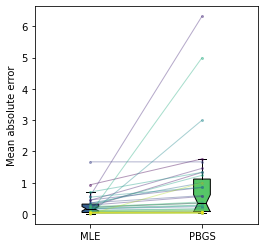

In [66]:
scale = 4
fig, ax = plt.subplots(figsize=(scale, scale))

cmap = plt.colormaps['viridis']
c_list = cmap(np.linspace(0, 1, len(mle_mae[mle_mae != 0])))

scatter_data = [mle_mae[mle_mae != 0], pbgs_mae[pbgs_mae != 0]]
scatter_labels = ["MLE", "PBGS"]

box = ax.boxplot(scatter_data, notch=True, patch_artist=True, sym="")

for index, pair in enumerate(zip(scatter_data[0], scatter_data[1])):
    ax.plot([1, 2], pair, marker="o", ms=2, linewidth=1, alpha=0.4, color=c_list[index])

colors = [c_list[10], c_list[25]]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

for median in box['medians']:
    median.set_color('black')

ax.set_xticklabels(scatter_labels)

ax.set_ylabel("Mean absolute error")

fig.savefig("mae_comparison.png", dpi=300)